In [1]:
import numpy as np
import pandas as pd
from math import sqrt,acos,degrees
import matplotlib.pyplot as plt
from scipy.signal import resample
from tqdm.notebook import tqdm
from time import time
import os
import csv
from openpyxl import load_workbook
from math import radians
from Data_preparation_Library import *

## Data Extraction from Excel (Cumilative Function)

In [2]:
def emg_xlsx(workbook,typ):
    emg_labels = ['Frame','Sub Frame',
                 'EMG1',
                 'EMG2',
                 'EMG3',
                 'EMG4',
                 'EMG5',
                 'EMG6',
                 'EMG7',
                 'EMG8',
                 'EMG9',
                 'EMG10',
                 'EMG11',
                 'EMG12']
    
    sheet = workbook.active
    if(typ=='b'):
        table = sheet['BO6':'BZ92005']
        frames = sheet['A6':'B92005']
    else:
        table = sheet['BO6':'BZ54005']
        frames = sheet['A6':'B54005']
    table = tuple(table)
    frames = tuple(frames)
    frames_arr = []
    emg_arr = []
    for t in range(len(table)):
        row = []
        for i in range(12):
            row.append(table[t][i].value)
        frame = []
        for i in range(2):
            frame.append(frames[t][i].value)
        emg_arr.append(row)
        frames_arr.append(frame)

    emg_arr = np.array(emg_arr)
    frames_arr = np.array(frames_arr)

    emg_df = pd.DataFrame(columns=emg_labels)

    for i in range(2):
        emg_df[emg_labels[i]] = frames_arr[:,i]
    emg_labels = emg_labels[2:]
    for i in range(12):
        emg_df[emg_labels[i]] = emg_arr[:,i]
    return emg_df

def marker_xlsx(workbook,typ):
    marker_labels = ['Frame','Sub Frame',
                  'RSHO_X','RSHO_Y','RSHO_Z',
                  'RUPA_X','RUPA_Y','RUPA_Z',
                  'RELB_X','RELB_Y','RELB_Z',
                  'RM1_X','RM1_Y','RM1_Z',
                 'RFRM_X','RFRM_Y','RFRM_Z',
                 'WRM2_X','WRM2_Y','WRM2_Z',
                 'RWRA_X','RWRA_Y','RWRA_Z',
                 'RWRB_X','RWRB_Y','RWRB_Z',
                 'RFIN_X','RFIN_Y','RFIN_Z']
    sheet = workbook.active
    if(typ=='b'):
        table = sheet['A92012':'AC96611']
    else:
        table = sheet['A54012':'AC56711']
    table = tuple(table)
    emg_arr = []
    for t in range(len(table)):
        row = []
        for i in range(29):
            row.append(table[t][i].value)
        emg_arr.append(row)
    emg_arr = np.array(emg_arr)
    marker_df = pd.DataFrame(columns=marker_labels)
    for i in range(29):
        marker_df[marker_labels[i]] = emg_arr[:,i]
    return marker_df

def extract_df_xlsx(filename,typ):
    workbook = load_workbook(filename)
    emg_df = emg_xlsx(workbook,typ)
    marker_df = marker_xlsx(workbook,typ)
    return emg_df, marker_df

In [3]:
filename = file = 'Subjects/Fazil/marker_data/Hammer02.xlsx'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
emg_df, marker_df = extract_df_xlsx(filename,'c')

KeyboardInterrupt: 

In [4]:
marker_df = marker_df[300:2500]

In [4]:
marker_df

,Frame,Sub Frame,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,...,WRM2_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z
0,1.0,0.0,-25.2777,1338.42,1621.98,-157.375,1379.28,1624.54,-309.213,1416.34,...,1701.34,-622.147,1357.85,1702.44,-614.392,1417.64,1689.29,-709.343,1391.30,1722.61
1,2.0,0.0,-25.2424,1338.58,1621.98,-157.344,1379.44,1624.56,-309.177,1416.48,...,1701.52,-622.085,1358.00,1702.59,-614.349,1417.80,1689.44,-709.284,1391.47,1722.83
2,3.0,0.0,-25.1930,1338.75,1621.98,-157.327,1379.62,1624.58,-309.173,1416.59,...,1701.65,-622.025,1358.17,1702.74,-614.283,1417.97,1689.60,-709.221,1391.62,1723.00
3,4.0,0.0,-25.1365,1338.96,1621.97,-157.256,1379.81,1624.59,-309.109,1416.74,...,1701.75,-621.990,1358.39,1702.90,-614.209,1418.15,1689.73,-709.151,1391.83,1723.16
4,5.0,0.0,-25.1300,1339.15,1621.98,-157.215,1379.97,1624.65,-309.075,1416.88,...,1701.91,-621.906,1358.57,1703.07,-614.157,1418.34,1689.85,-709.128,1392.06,1723.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2696.0,0.0,-13.4675,1366.11,1636.84,-147.174,1399.35,1644.06,-294.475,1450.44,...,1657.63,-620.895,1372.63,1647.61,-614.353,1433.14,1650.62,-710.978,1403.10,1661.77
2696,2697.0,0.0,-13.3316,1366.28,1636.88,-147.018,1399.53,1644.08,-294.276,1450.61,...,1657.69,-620.690,1372.80,1647.66,-614.168,1433.30,1650.66,-710.801,1403.26,1661.77
2697,2698.0,0.0,-13.1861,1366.47,1636.88,-146.823,1399.70,1644.13,-294.073,1450.76,...,1657.78,-620.540,1373.00,1647.75,-614.035,1433.53,1650.73,-710.657,1403.51,1661.82
2698,2699.0,0.0,-13.0691,1366.63,1636.89,-146.689,1399.86,1644.14,-293.931,1450.92,...,1657.80,-620.396,1373.17,1647.81,-613.862,1433.69,1650.81,-710.519,1403.74,1661.82


In [5]:
marker_df.isnull()

,Frame,Sub Frame,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,...,WRM2_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Finding RDTM

In [6]:
marker_df.columns

Index(['Frame', 'Sub Frame', 'RSHO_X', 'RSHO_Y', 'RSHO_Z', 'RUPA_X', 'RUPA_Y',
       'RUPA_Z', 'RELB_X', 'RELB_Y', 'RELB_Z', 'RM1_X', 'RM1_Y', 'RM1_Z',
       'RFRM_X', 'RFRM_Y', 'RFRM_Z', 'WRM2_X', 'WRM2_Y', 'WRM2_Z', 'RWRA_X',
       'RWRA_Y', 'RWRA_Z', 'RWRB_X', 'RWRB_Y', 'RWRB_Z', 'RFIN_X', 'RFIN_Y',
       'RFIN_Z'],
      dtype='object')

In [55]:
RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
RWRA = marker_df[['RWRA_X','RWRA_Y', 'RWRA_Z']].values
RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
MID = (np.array(RWRB) + np.array(RWRA))/2

## Find RDTM of One Frame

In [8]:
import Geometry3D as G3D
from math import sin, cos, radians

In [57]:
A = RFIN[0]
B = MID[0]
D = RWRB[0]
E = RWRA[0]
theta = radians(30) # degrees

In [41]:
pA = G3D.Point(A[0],A[1],A[2])
pB = G3D.Point(B[0],B[1],B[2])
pD = G3D.Point(D[0],D[1],D[2])
pE = G3D.Point(E[0],E[1],E[2])
plane = G3D.Plane(pA,pB,pD)

In [42]:
## EQ of Line AC - lv,mv,nv
BD = G3D.Line(pB,pD)
lv,mv,nv = BD.dv

In [43]:
## EQ of Line BC - l,m,n
a,b,c,d = plane.general_form()

In [44]:
m = (cos(theta) - sin(theta)*b*lv/nv - (sin(theta)*a*lv**2)/nv*mv - sin(theta)*a*nv/mv)
m = m / ((lv**2 + mv**3 + nv**2)/mv)
l = sin(theta)*b/nv + lv*sin(theta)*a/(nv*mv) + lv*m/mv
n = (sin(theta)*a + nv*m)/mv

In [45]:
ac = G3D.Vector([lv,mv,nv])
bc = G3D.Vector([l,m,n])
line_AC = G3D.Line(pA,ac)
line_BC = G3D.Line(pB,bc)
G3D.intersection(line_AC,line_BC)

Point(-784.8038898933762, 1316.972858940131, 1531.5565553148092)

In [34]:
def get_RDTM(A,B,D,theta):
    Ax,Ay,Az = A[0],A[1],A[2]
    Bx,By,Bz = B[0],B[1],B[2]
    Dx,Dy,Dz = D[0],D[1],D[2]
    
    pA = G3D.Point(A[0],A[1],A[2])
    pB = G3D.Point(B[0],B[1],B[2])
    pD = G3D.Point(D[0],D[1],D[2])

    a,b,c = plane_normal(A,B,D)

    v = normalize_vector([Dx - Bx,Dy - By,Dz - Bz])
    lv,mv,nv = v

    m = (cos(theta) - sin(theta)*b*lv/nv - (sin(theta)*a*lv**2)/nv*mv - sin(theta)*a*nv/mv)
    m = m / ((lv**2 + mv**3 + nv**2)/mv)
    l = sin(theta)*b/nv + lv*sin(theta)*a/(nv*mv) + lv*m/mv
    n = (sin(theta)*a + nv*m)/mv
    
    y = normalize_vector([l,m,n])
    l,m,n = v
    
    return intersection_lines([l,m,n],B,[lv,mv,nv],A)

In [35]:
def intersection_lines(v,B,y,A):
    l,m,n = v
    lv,mv,lv = y
    Bx, By, Bz = [B[0], B[1], B[2]]
    Ax, Ay, Az = [A[0], A[1], A[2]]
    
    lam = lv*(By-Ay) - mv*(Bx+Ax)
    lam = lam/(l*mv - m*lv)
    mu = (Bx - Ax + lam*l)/lv
    
    x = Bx + lam*l
    y = By + lam*m
    z = Bz + lam*n
    
    return np.array([x,y,z])

def normalize_vector(v):
    v = np.array(v)
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    else:
        return v / norm
    
def plane_normal(P1,P2,P3):
    P12 = np.array(P2) - np.array(P1)
    P13 = np.array(P3) - np.array(P1)
    normal = np.cross(P12,P13)
    normal = normalize_vector(normal)
    return normal

## RDTM Angles

In [36]:
def get_DTM_angles(marker_df, theta):
    all_RDTM = get_RDTM_df(marker_df,theta)
    
    RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
    WRM2 = marker_df[['WRM2_X', 'WRM2_Y','WRM2_Z']].values
    RWRA = marker_df[['RWRA_X','RWRA_Y', 'RWRA_Z']].values
    RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
    MID = (np.array(RWRB) + np.array(RWRA))/2
    
    dtm_anles = angles_lines(all_RDTM,WRM2,MID,deg=True)    
    dtm_anles_fl = filter_array(dtm_anles,order=4,cf=5,fs=100)
    return dtm_anles_fl

def get_RDTM_df(marker_df, theta):
    RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
    WRM2 = marker_df[['WRM2_X', 'WRM2_Y','WRM2_Z']].values
    RWRA = marker_df[['RWRA_X','RWRA_Y', 'RWRA_Z']].values
    RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
    MID = (np.array(RWRB) + np.array(RWRA))/2
    theta = radians(30) # degrees

    A_all= RFIN
    B_all= MID
    D_all= RWRB

    RDTM_all = []
    for i in range(marker_df.shape[0]):
        A = A_all[i]
        B = B_all[i]
        D = D_all[i]
        x,y,z = get_RDTM(A,B,D,theta)
        rdtm = [x,y,z]
        RDTM_all.append(rdtm)

    return np.array(RDTM_all)

def angles_lines(p1,p2,mid,deg=False):
    u = np.array(p1)-np.array(mid)
    v = np.array(p2)-np.array(mid)
    i1,j1,k1 = u[:,0],u[:,1],u[:,2]
    i2,j2,k2 = v[:,0],v[:,1],v[:,2]
    angles = []
    for t in range(len(i1)):
        cos_t = abs(i1[t]*i2[t]+j1[t]*j2[t]+k1[t]*k2[t])
        cos_t = cos_t/(sqrt(i1[t]**2+j1[t]**2+k1[t]**2)*sqrt(i2[t]**2+j2[t]**2+k2[t]**2))
        if deg==False:
            angles.append(acos(cos_t))  
        if deg==True:
            angles.append(degrees(acos(cos_t)))
    return np.array(angles)

In [42]:
dtm_anles = get_DTM_angles(marker_df,90-8)

In [31]:
all_RDTM = get_RDTM_df(marker_df, 90-8)
all_RDTM.shape

(2700, 3)

In [47]:
RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
WRM2 = marker_df[['WRM2_X', 'WRM2_Y','WRM2_Z']].values
RWRA = marker_df[['RWRA_X','RWRA_Y', 'RWRA_Z']].values
RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
MID = (np.array(RWRB) + np.array(RWRA))/2

dtm_anles = angles_lines(all_RDTM,WRM2,MID,deg=True)

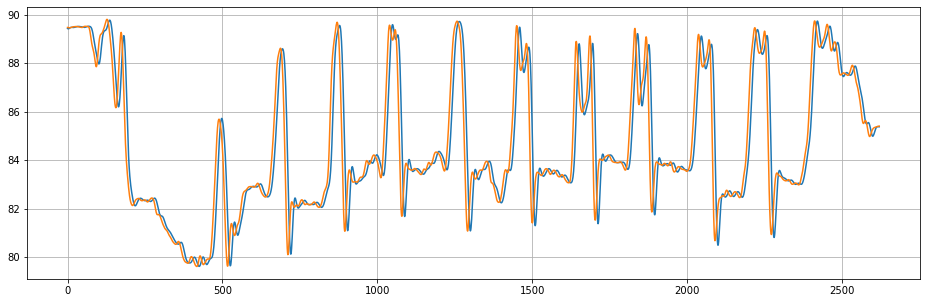

In [44]:
plt.figure(figsize=(16,5))
dtm_anles_fl = filter_array(dtm_anles,order=4,cf=5,fs=100)
plt.grid()
plt.plot(dtm_anles_fl[80:])
plt.plot(dtm_anles[80:])
plt.show()

<AxesSubplot:title={'center':'Subjects/Fazil/computed_Hammer.csv'}>

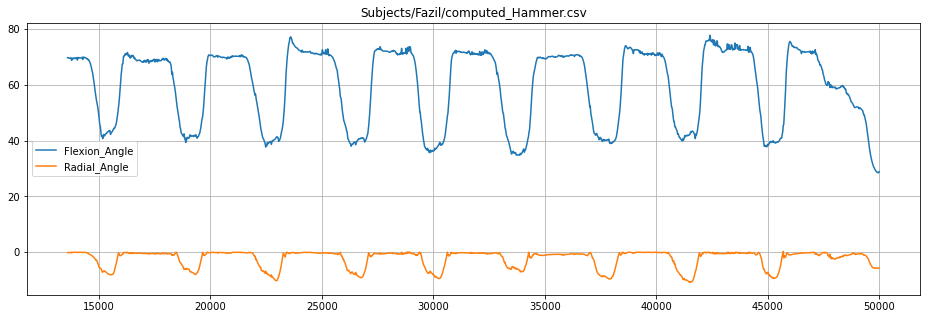

In [17]:
file = 'Subjects/Fazil/computed_Hammer.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
df = pd.read_csv(file,index_col=0)[12000:50000]
# Smoothen
# for angle in angle_lables: df[angle] = filter_array(df[angle].values,order=4,cf=1,fs=2000)
    
df[1600:][angle_lables[1:3]].plot(figsize=(16,5),title=file,grid=True)

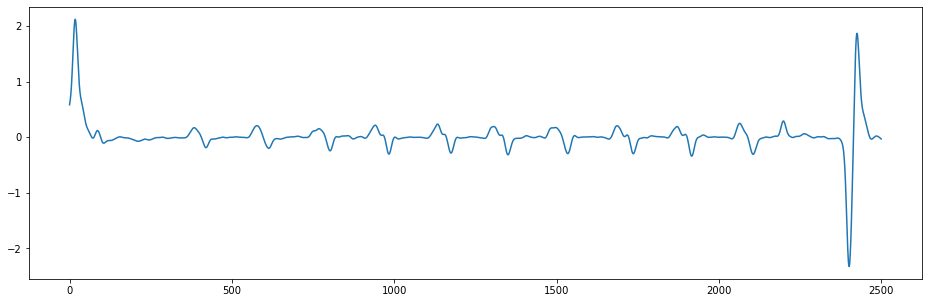

In [18]:
a = np.diff([0]+list(dtm_anles_fl))
a = filter_array(a,order=1,cf=1,fs=100)
# arr = arr/(1/100)
# b,a = signal.butter(1, 1,fs=2000)
# arr = signal.lfilter(b, a,arr)
plt.figure(figsize=(16,5))
plt.plot(a[200:])
# pd.DataFrame(arr).plot(figsize=(16,5),title='Velocity',grid=True)